In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from AlexNet import AlexNet
from caffe_classes2 import class_names

In [4]:
tf.reset_default_graph()

In [5]:
x = tf.placeholder(tf.float32, [1, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)
model = AlexNet(x, keep_prob, 2, [],'catdog_alexnet1.npy')

name is conv1 np.shape(input) ()
name is pool1 np.shape(input) (1, 55, 55, 96)
name is norm1 np.shape(input) (1, 27, 27, 96)
name is conv2 np.shape(input) ()
name is pool2 np.shape(input) (1, 27, 27, 256)
name is norm2 np.shape(input) (1, 13, 13, 256)
name is conv3 np.shape(input) ()
name is conv4 np.shape(input) ()
name is conv5 np.shape(input) ()
name is pool5 np.shape(input) (1, 13, 13, 256)
name is fc6 np.shape(input) (1, 9216)
name is fc7 np.shape(input) (1, 4096)
name is fc8 np.shape(input) (1, 4096)


In [1]:
#tf.global_variables()

In [6]:
#define activation of last layer as score
score = model.fc8
#create op to calculate softmax 
softmax = tf.nn.softmax(score)

In [2]:
img1 = cv2.imread('/Users/ruiwenhao/Documents/work/deeplearning/code/AlexNet3/pictures/test' + '/11.jpg')
img2 = cv2.imread('/Users/ruiwenhao/Documents/work/deeplearning/code/AlexNet3/pictures/test' + '/11915.jpg')
# imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

In [35]:
imgs = [img1,img2]

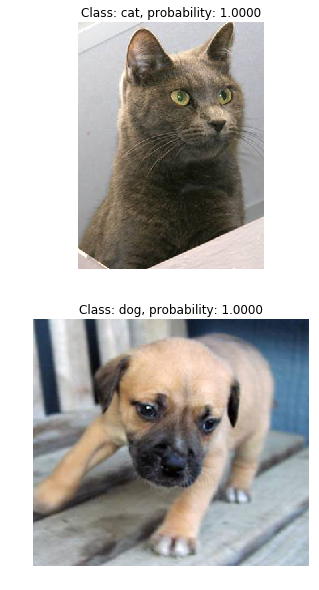

In [36]:
with tf.Session() as sess: 
    # Initialize all variables
    sess.run(tf.global_variables_initializer())   
    # Load the pretrained weights into the model
    model.load_weights(sess)    
    # Create figure handle
    fig2 = plt.figure(figsize=(15,10))    
    # Loop over all images
    for i, image in enumerate(imgs):        
        # Convert image to float32 and resize to (227x227)
        img = cv2.resize(image.astype(np.float32), (227,227))       
        # Subtract the ImageNet mean
        img = img - imagenet_mean       
        # Reshape as needed to feed into model
        img = img.reshape((1,227,227,3))        
        # Run the session and calculate the class probability
        probs = sess.run(softmax, feed_dict={x: img, keep_prob: 1})       
        # Get the class name of the class with the highest probability
        class_name = class_names[np.argmax(probs)]       
        # Plot image with class name and prob in the title
        fig2.add_subplot(len(imgs),1,i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Class: " + class_name + ", probability: %.4f" %probs[0,np.argmax(probs)])
        plt.axis('off')